1. Run a PCA based on quantitative environmental variables (see previous exercise), using sites from the Douro and Tejo basins. Produce a biplot with ‘Catchment_name’ as a grouping variable.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")
df = df.dropna()

In [3]:
dftejodouro = df[(df['Catchment_name']=='Douro') | (df['Catchment_name']=='Tejo')]

dfenviroment = dftejodouro[["Altitude", "Actual_river_slope","Elevation_mean_catch", "prec_ann_catch","temp_ann","temp_jan","temp_jul"]]
dfenviroment

,Altitude,Actual_river_slope,Elevation_mean_catch,prec_ann_catch,temp_ann,temp_jan,temp_jul
18,1179,0.001,1687.103217,810.092422,9.3,1.4,18.4
19,1038,2.258,1293.238318,650.030528,10.4,2.2,19.6
28,636,0.263,967.398405,513.949149,12.6,3.8,21.3
32,890,2.909,1088.329483,553.756064,11.2,2.7,20.5
43,872,3.530,985.273741,518.863081,11.1,2.6,20.0
...,...,...,...,...,...,...,...
4947,38,0.100,704.675069,515.039678,17.1,10.3,23.8
4948,26,0.100,702.673201,516.097287,17.1,10.4,23.6
4949,20,0.100,697.730192,518.386401,16.7,10.8,22.9
4950,13,0.100,679.784324,556.028518,16.7,10.9,22.7


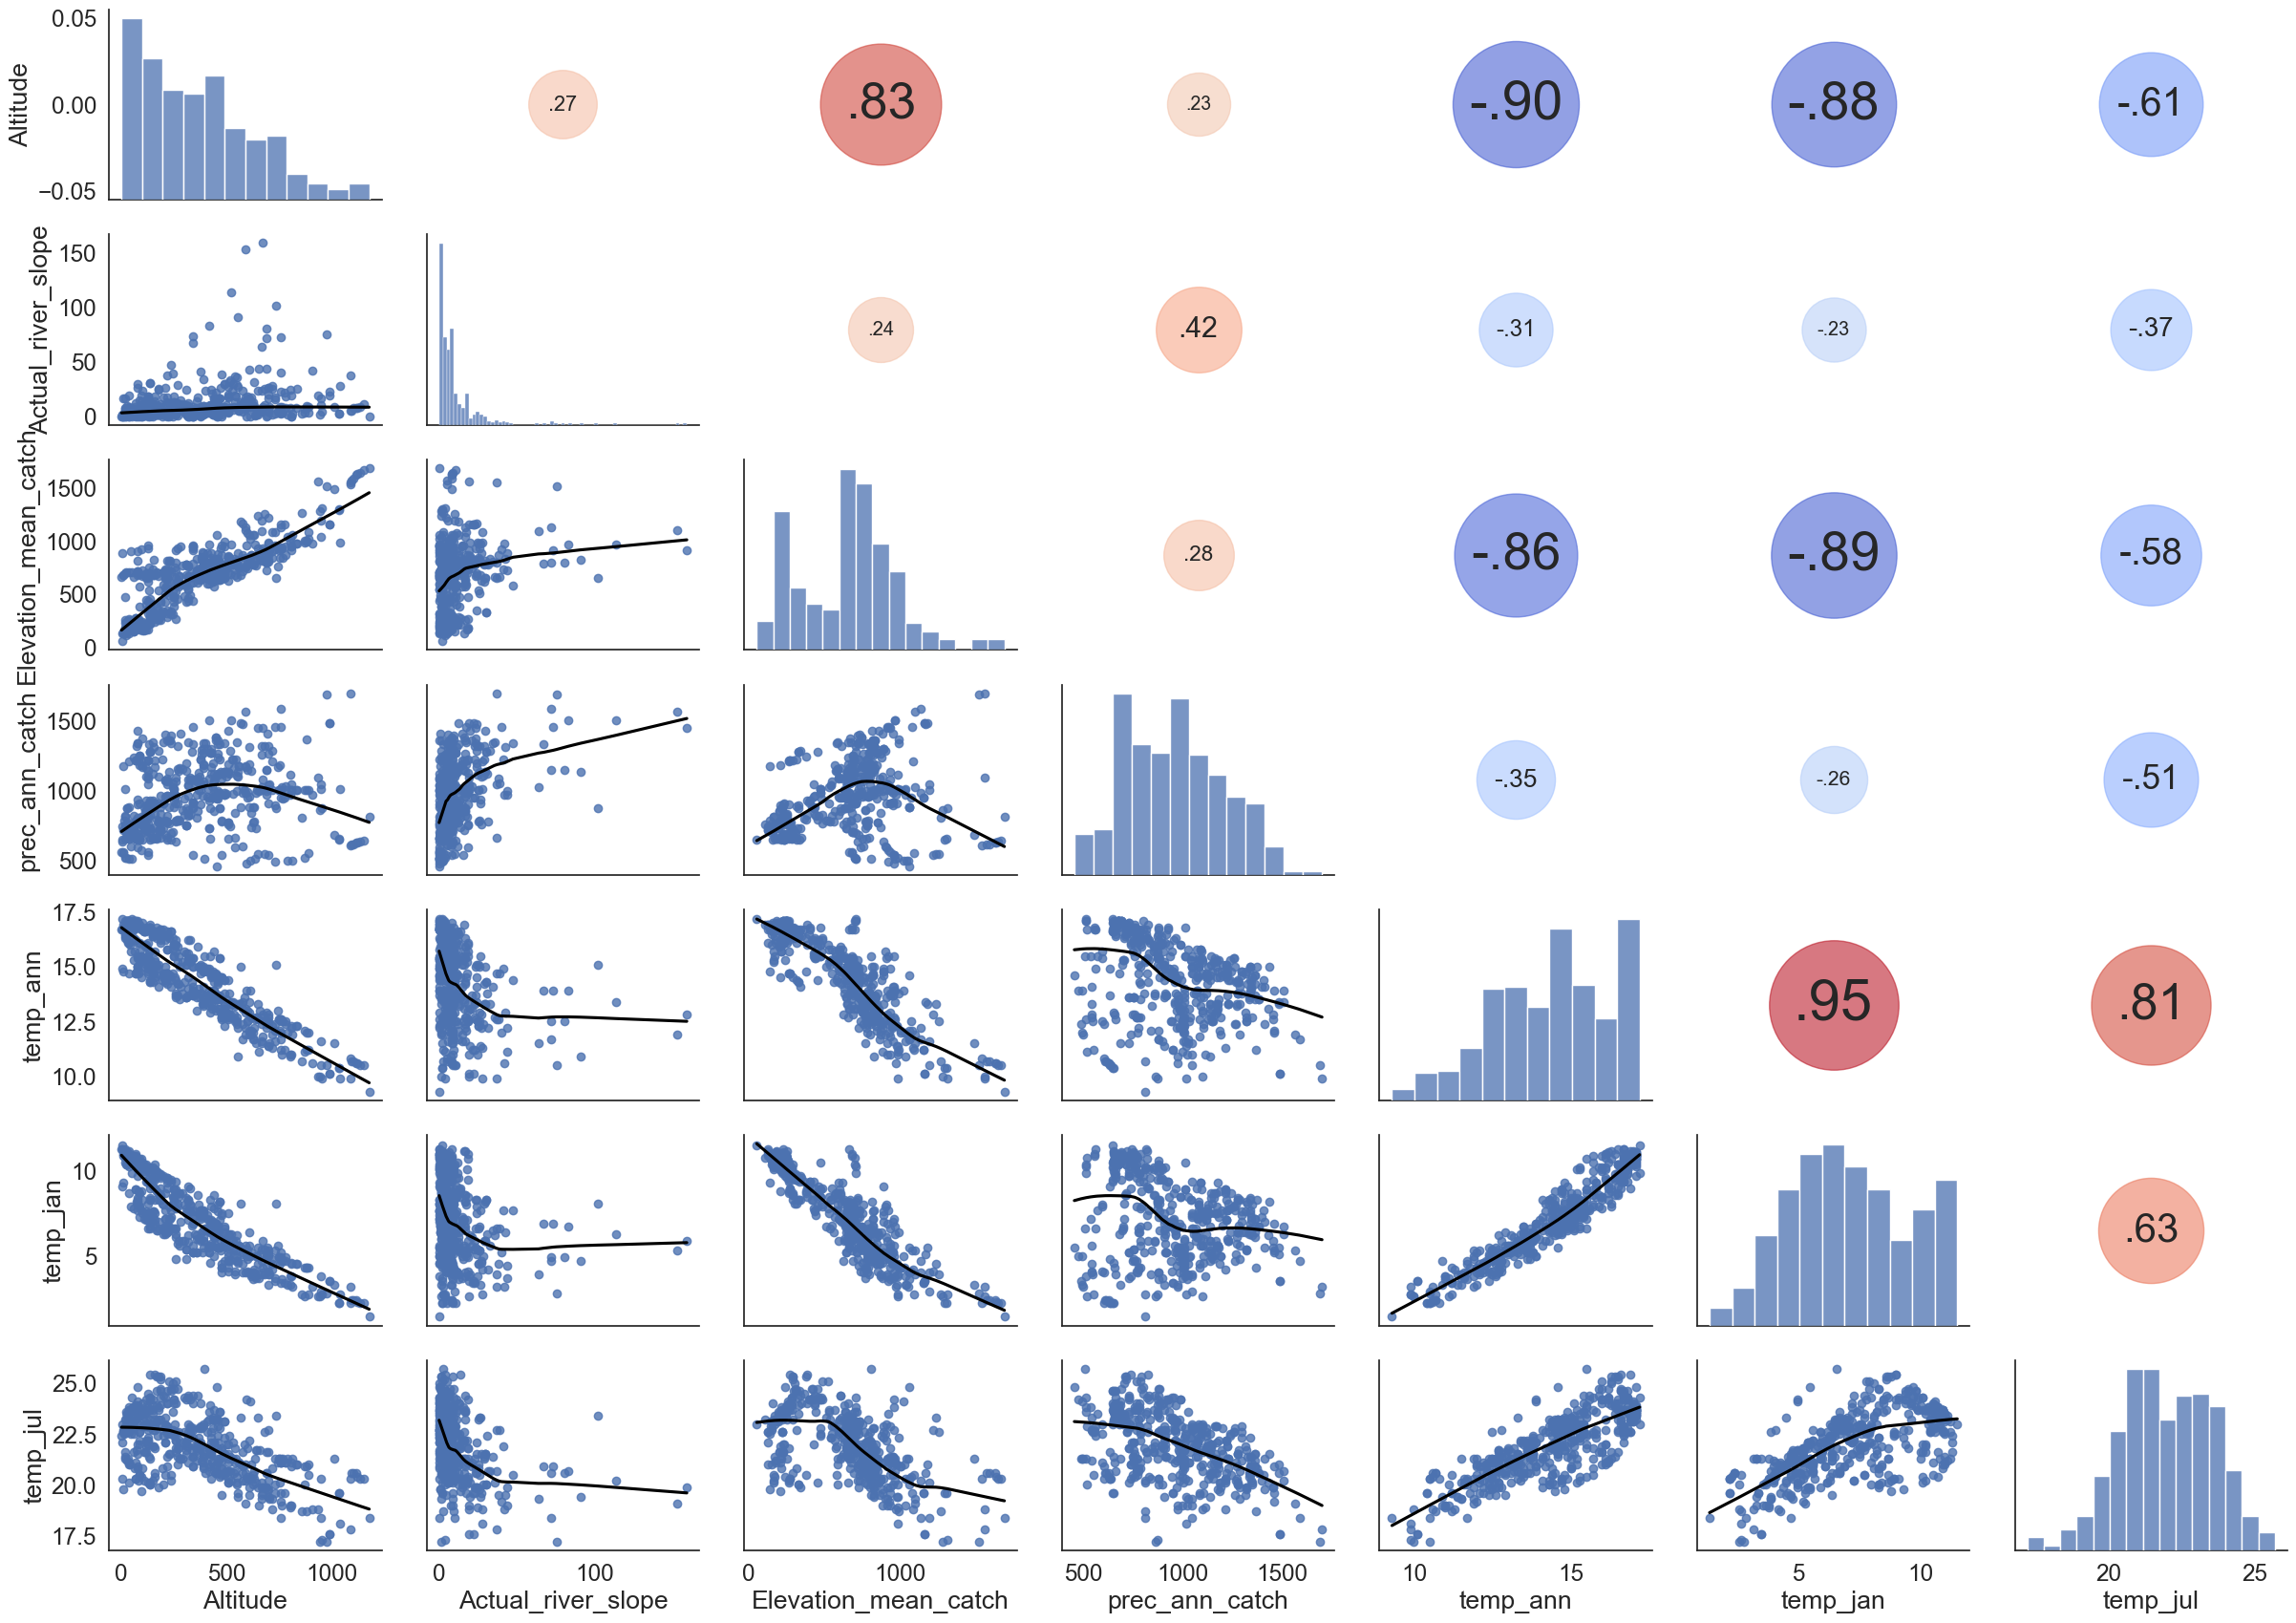

In [4]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=1.6)

g = sns.PairGrid(dfenviroment, aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.histplot, kde_kws={'color': 'black'})
g.map_upper(corrdot);

In [5]:
env_scaled = StandardScaler().fit_transform(dfenviroment)
df1_scaled = pd.DataFrame(data=env_scaled, 
                                columns=dfenviroment.columns)
df1_scaled.head()

,Altitude,Actual_river_slope,Elevation_mean_catch,prec_ann_catch,temp_ann,temp_jan,temp_jul
0,3.002541,-0.635303,3.274284,-0.591536,-2.756492,-2.389199,-2.215321
1,2.481245,-0.500834,2.020549,-1.235061,-2.159600,-2.055191,-1.463074
2,0.994996,-0.619693,0.983347,-1.782173,-0.965816,-1.387173,-0.397390
3,1.934069,-0.462048,1.368290,-1.622130,-1.725497,-1.846435,-0.898889
4,1.867521,-0.425049,1.040247,-1.762416,-1.779760,-1.888186,-1.212325


In [6]:
pca = PCA(n_components=7)
pca.fit_transform(df1_scaled)

array([[ 5.57787293, -2.55575821, -0.21699638, ...,  0.29548608,
         0.82484278,  0.06373648],
       [ 4.00205848, -2.51503778,  0.33580977, ..., -0.14187326,
         0.29455841, -0.00711034],
       [ 1.53421336, -2.31488304,  0.61931889, ...,  0.20463529,
        -0.19603614, -0.14903837],
       ...,
       [-2.4931115 , -0.87391481,  0.4900484 , ...,  1.10794224,
         0.90837718,  0.08674624],
       [-2.4654649 , -0.72209753,  0.36118852, ...,  1.08878938,
         0.91759771,  0.07645519],
       [-2.48628059, -0.69043921,  0.34202741, ...,  1.09765213,
         0.97148689,  0.03517776]])

In [7]:
eigenvalues = pca.explained_variance_
prop_var = pca.explained_variance_ratio_

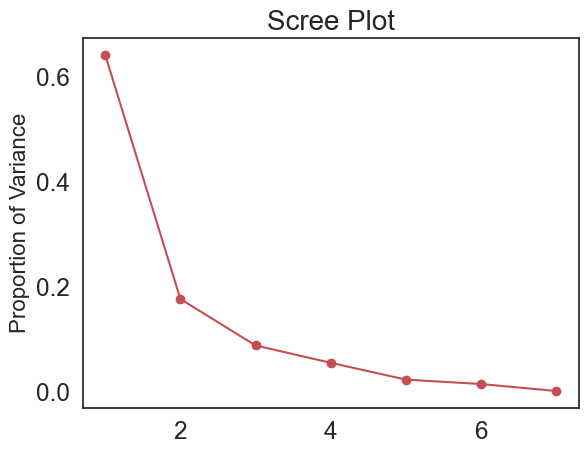

In [8]:
PC_numbers = np.arange(pca.n_components_) + 1
 
plt.plot(PC_numbers, 
         prop_var,
         'ro-')
plt.title('Scree Plot', fontsize=20)
plt.ylabel('Proportion of Variance', fontsize=16)
plt.show()

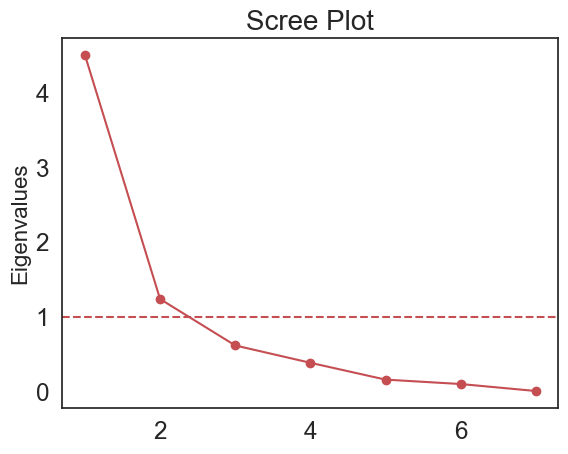

In [9]:
PC_numbers = np.arange(pca.n_components_) + 1
 
plt.plot(PC_numbers, 
         eigenvalues,
         'ro-')
plt.title('Scree Plot', fontsize=20)
plt.ylabel('Eigenvalues', fontsize=16)
plt.axhline(y=1, color='r', 
            linestyle='--')

In [10]:
#According to this rule, 2 components should be retained.

pca = PCA(n_components=2)
PC = pca.fit_transform(df1_scaled)
pca_env = pd.DataFrame(data = PC, 
                            columns = ['PC1', 'PC2'])
pca_env.head(8)

,PC1,PC2
0,5.577873,-2.555758
1,4.002058,-2.515038
2,1.534213,-2.314883
3,2.908218,-2.498679
4,2.881538,-2.430876
5,1.720899,-2.396624
6,3.875731,-1.730944
7,5.005704,-0.714902


In [11]:
def biplot(score,coef,labels=None): 
 
    xs = score[:,0] # PC1 object scores
    ys = score[:,1] # PC2 object scores 
    n = coef.shape[0] # number of dimensions (2)
    scalex = 1.0/(xs.max() - xs.min()) # to rescale scores
    scaley = 1.0/(ys.max() - ys.min()) # to rescale scores
    plt.scatter(xs * scalex,ys * scaley,
                s=6, 
                color='green') # scatter plot using rescaled object scores
 
    for i in range(n):
        plt.arrow(0, 0, coef[i,0], 
                  coef[i,1],color = 'blue',
                  head_width=0.01,
                  alpha = 0.5) # plot arrows for each variable
        plt.text(coef[i,0]* 1.15, 
                 coef[i,1] * 1.15, 
                 labels[i], 
                 color = 'black', 
                 ha = 'center', 
                 va = 'center') # variable labels for each arrow
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))    
 
 
    plt.figure()

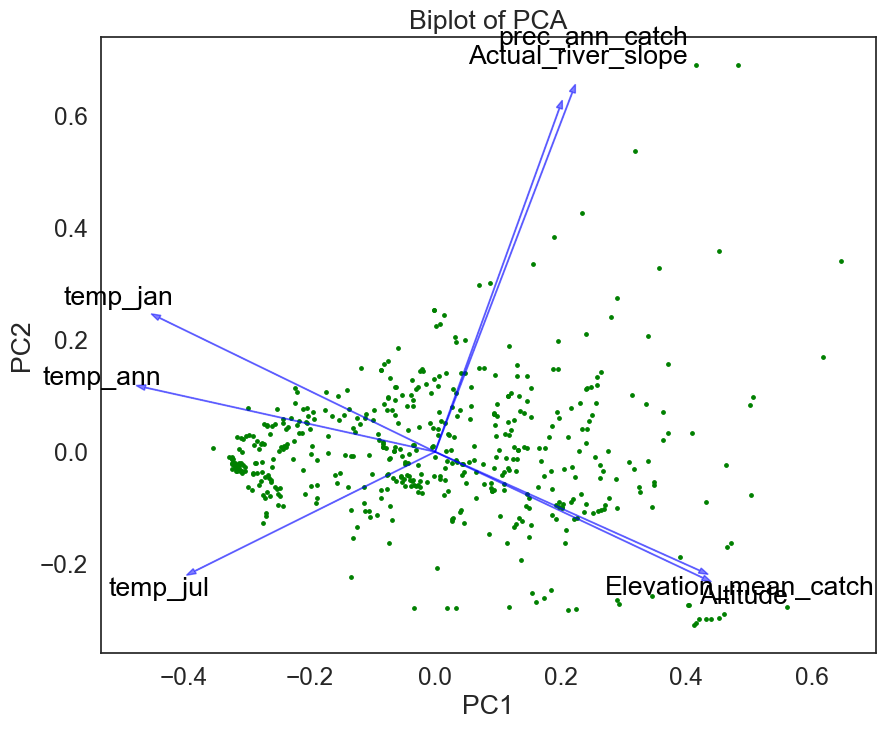

<Figure size 640x480 with 0 Axes>

In [13]:
plt.figure(figsize=(10, 8))
plt.title('Biplot of PCA')
 
biplot(PC, 
       np.transpose(pca.components_), 
       list(dfenviroment.columns))

Text(0, 0.5, 'PC2')

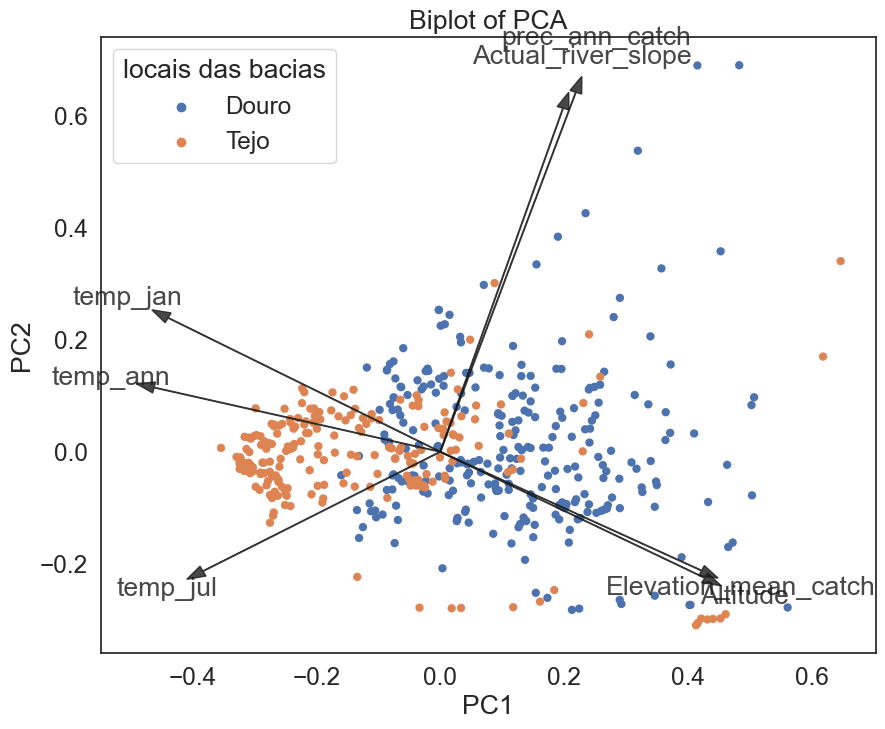

In [14]:
PC1 = pca_env['PC1']/(pca_env['PC1'].max() - pca_env['PC1'].min())
PC2 = pca_env['PC2']/(pca_env['PC2'].max() - pca_env['PC2'].min())

plt.figure(figsize=(10, 8))
plt.title('Biplot of PCA')
sns.scatterplot(x=PC1,
              y=PC2,
              hue = dftejodouro['Catchment_name'].tolist(),
              linewidth=0,
              )

n = np.transpose(pca.components_).shape[0] 
for i in range(n):
        plt.arrow(0, 0, np.transpose(pca.components_)[i,0], 
                  np.transpose(pca.components_)[i,1], 
                  color = (0.1, 0.1, 0.1, 0.8),
                  head_width=0.02) 
        plt.text(np.transpose(pca.components_)[i,0]* 1.15, 
                 np.transpose(pca.components_)[i,1] * 1.15, 
                 list(dfenviroment.columns)[i], 
                 color = (0.1, 0.1, 0.1, 0.8), 
                 ha = 'center', 
                 va = 'center')
plt.legend(title='locais das bacias')
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))

2. Using the same data, run a MDS and a NMDS and project the sites using the resulting first two axis. Use also the ‘Catchment_name’ as a grouping variable.

<AxesSubplot: >

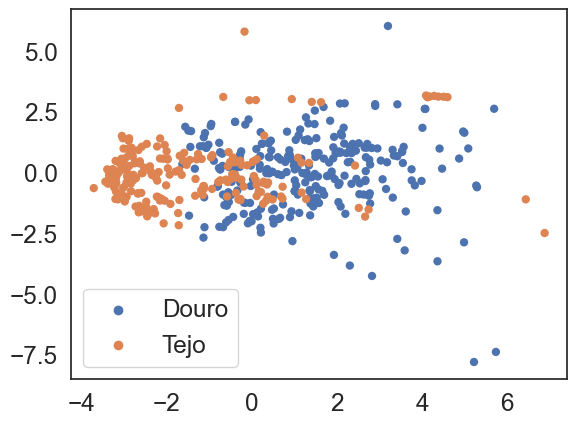

In [18]:
mds = MDS(random_state=0, normalized_stress = False) 
mds_transf = mds.fit_transform(df1_scaled)

sns.scatterplot(x=mds_transf[:,0],
              y=mds_transf[:,1],
              hue = dftejodouro['Catchment_name'].tolist(),
              linewidth=0,
              )

0.1510349391951685


<AxesSubplot: >

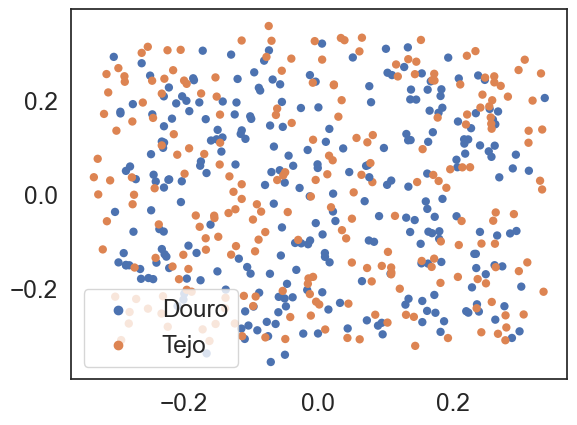

In [20]:
# 5 components extracted so that stress is > 0.2
nmds = MDS(n_components=7, random_state=0, metric = False, normalized_stress="auto") 
nmds_transf = nmds.fit_transform(df1_scaled)
stress = nmds.stress_
print(stress)
sns.scatterplot(x=nmds_transf[:,0],
              y=nmds_transf[:,1],
              hue = dftejodouro['Catchment_name'].tolist(),
              linewidth=0,
              )